# Exploratory Data Analysis on Customer Bookings data for British Airways


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose best model


## 1) Problem statement
- The goal of this project is to develop a predictive model that determines whether a customer is likely to purchase holidays based on their booking data.

## 2) Data Collection

### 2.1 Import data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv( "customer_booking.csv",  encoding="ISO-8859-1")

#### Show Top 5 Records

In [34]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


#### Shape of the dataset

In [36]:
df.shape

(50000, 14)

## 2.2 Dataset information

- num_passengers = number of passengers travelling
- sales_channel = sales channel booking was made on
- trip_type = trip Type (Round Trip, One Way, Circle Trip)
- purchase_lead = number of days between travel date and booking date
- length_of_stay = number of days spent at destination
- flight_hour = hour of flight departure
- flight_day = day of week of flight departure
- route = origin -> destination flight route
- booking_origin = country from where booking was made
- wants_extra_baggage = if the customer wanted extra baggage in the booking
- wants_preferred_seat = if the customer wanted a preferred seat in the booking
- wants_in_flight_meals = if the customer wanted in-flight meals in the booking
- flight_duration = total duration of flight (in hours)
- booking_complete = flag indicating if the customer completed the booking

## 3.1 Check Missing values

In [39]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

There are no missing values in the data set

## 3.2 Check Duplicates

In [43]:
df.duplicated().sum()

719

There are 719 duplicated values in the dataset 

In [48]:
df.drop_duplicates(inplace=True)

In [50]:
df.shape

(49281, 14)

#### Now the data consists of 14 columns and 49281 rows  

## 3.3 Check data types

In [54]:
# Check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


## 3.4 Checking the number of unique vales of each column

In [60]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

## 3.5 Check statistics of data set

In [37]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


##### Insight

- From above description of numerical data, the average number of passengers(num_passengers) is approximately 1.59, indicating that most bookings involve single travelers or small groups.
- The average purchase lead time (purchase_lead) is around 84.94, suggesting that customers typically book holidays well in advance.
- The booking_complete column has a mean value of 0.15, indicating that only a small proportion of bookings are completed.

## 3.5 Check if the data target is balanced 

In [67]:
df.booking_complete.value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

#### Imbalanced dataset: we apply oversampling and undersampling methods later for the train set.

## 3.6 Exploring Data

In [73]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [87]:
# define numerical and caetgorical columns

numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

We have 5 categorical features : ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


### Sales Channel

In [16]:
# Count bookings by sales channel
channel_counts=df['sales_channel'].value_counts()
channel_counts

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [18]:
#calculate percentages
total_bookings=channel_counts.sum()
percentage_internet=(channel_counts['Internet'] / total_bookings) * 100
percentage_phone=(channel_counts['Mobile'] / total_bookings) * 100

print(f'Percentage of bookings through Internet: {percentage_internet:.2f}%')
print(f'Percentage of bookings through Phone call: {percentage_phone:.2f}%')

Percentage of bookings through Internet: 88.76%
Percentage of bookings through Phone call: 11.24%


### Trip Type

In [36]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [27]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [38]:
print(f"Percentage of round trips: {per_round:.2f} %")
print(f"Percentage of One way trips: {per_oneway:.2f} %")
print(f"Percentage of circle trips: {per_circle:.2f} %")

Percentage of round trips: 98.99 %
Percentage of One way trips: 0.77 %
Percentage of circle trips: 0.23 %


In [40]:
# Comparing the booking completion rates for different trip types

round_trip_completed = df[df['trip_type'] == 'RoundTrip']['booking_complete'].mean() * 100
one_way_completed = df[df['trip_type'] == 'OneWay']['booking_complete'].mean() * 100
CircleTrip_completed = df[df['trip_type'] == 'CircleTrip']['booking_complete'].mean() * 100

print(f"Completion rate for RoundTrip: {round_trip_completed:.2f}%")
print(f"Completion rate for OneWay: {one_way_completed:.2f}%")
print(f"Completion rate for CircleTrip: {CircleTrip_completed :.2f}%")

Completion rate for RoundTrip: 15.06%
Completion rate for OneWay: 5.17%
Completion rate for CircleTrip: 4.31%


#### Insight:

- Round-trip bookings have a higher completion rate compared to one-way and circle-trip bookings


## Lenght of Stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

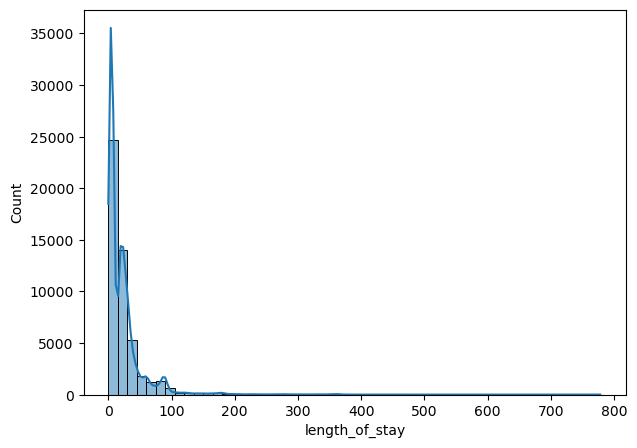

In [59]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

Let's see how many entries do we have that exceeds length of stay more than 100 days.

In [63]:
(df.length_of_stay> 200).value_counts()

length_of_stay
False    49721
True       279
Name: count, dtype: int64

In [65]:
df[df.length_of_stay> 500].booking_complete.value_counts()

booking_complete
0    9
1    1
Name: count, dtype: int64

We need to have more business knowledge to decide whether to remove these entries with more than 600 days of stay. There are could be many reasons for such bookings. But for now, we will just want to focus on bookings done for length of stay less than 500 days.

### Flight day

We will map the flight day with a number of a week.

In [76]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [78]:
df.flight_day.value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

Most of the customers want to travel on Monday and choose Saturday as least preffered day as flight day.

### Booking Origin

Text(0, 0.5, 'Number of bookings')

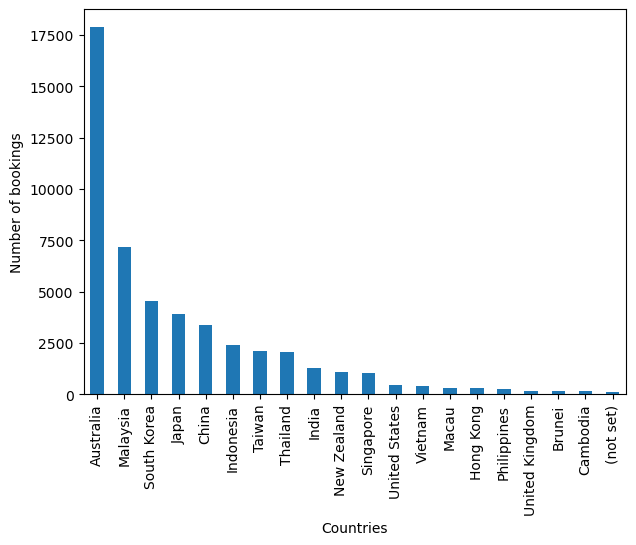

In [88]:
plt.figure(figsize=(7,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Above chart shows travellers from which country had maximum booking applications.

Text(0, 0.5, 'Number of complete bookings')

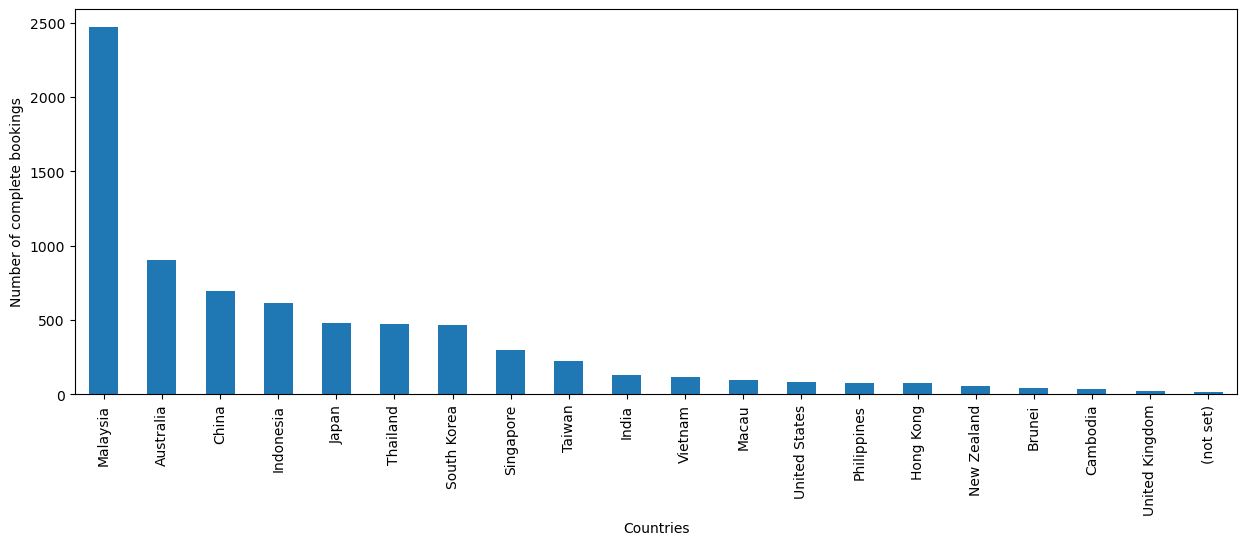

In [91]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Above chart shows travellers from which country had their booking complete.

### Booking complete

In [95]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100

In [97]:
unsuccessful_booking_per = 100-successful_booking_per

In [101]:
print(f"Out of 49281 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 49281 booking entries only 14.96 % bookings were successfull or complete.
